# NLP 기초 Assignment
## NLP 제대로 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 8주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
spam = pd.read_csv('spam.csv')

In [5]:
spam.head(6)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

## Tokenizing
- 실습코드에서는 한국어 대상이라 konlpy를 다뤘지만, 영어는 nltk 모듈을 쓸 수 있습니다. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋습니다. 특수문자는 없애주고, 모두 소문자로 변환해주는 전처리도 필요하겠죠?

In [39]:
origin_spam_text = spam['v2'].values
origin_spam_text = list(origin_spam_text)
origin_spam_text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### 소문자로 변환

In [40]:
spam_text = [i.lower() for i in origin_spam_text]
spam_text[0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

### 특수문자 삭제
공백, 숫자, 알파벳대소문자가 아닌 것들은 삭제

In [41]:
import re

spam_text = [re.sub(r"[^a-zA-Z0-9\s]","",i) for i in spam_text]
spam_text[0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

### 토큰화

In [44]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')
token_spam_text = [word_tokenize(i) for i in spam_text]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ann99\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [90]:
token_spam_text[:3]

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  '08452810075over18s']]

### 불용어 처리

In [46]:
from nltk.corpus import stopwords 

nltk.download('stopwords')
print('영어 불용어 갯수:',len(nltk.corpus.stopwords.words('english')))

영어 불용어 갯수: 179


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ann99\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
stop_words_spam_text = []
stop_words = set(stopwords.words('english')) 

for sentence in token_spam_text:
    result = []
    for token in sentence: 
        if token not in stop_words: 
            result.append(token)
    stop_words_spam_text.append(result)

In [48]:
stop_words_spam_text[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

### 한글자 단어 삭제

In [50]:
for sentence in stop_words_spam_text:
    for word in sentence:
        if len(word) == 1:
            sentence.remove(word)

In [51]:
stop_words_spam_text[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

### Lemmatize
단어원형으로 바꾸기

In [56]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lm = WordNetLemmatizer()

# [[lm.lemmatize(w, pos="v") for w in words] for sentence in stop_words_spam_text]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ann99\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [66]:
let_spam_text = [[lm.lemmatize(w, pos="v") for w in sentence] for sentence in stop_words_spam_text]

In [63]:
origin_spam_text[10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [67]:
let_spam_text[10]

['im',
 'gon',
 'na',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'ive',
 'cry',
 'enough',
 'today']

cried -> cry로 단어의 원형으로 바꿔진 것이 보인다.

In [69]:
import pickle
# save
with open('preprocessing_done_spam_text.pickle', 'wb') as f:
    pickle.dump(let_spam_text, f, pickle.HIGHEST_PROTOCOL)

In [72]:
# load
with open('preprocessing_done_spam_text.pickle', 'rb') as f:
    spam_text = pickle.load(f)
spam_text[:2]

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'get',
  'amore',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'oni']]

전처리 완료된 데이터는 저장

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [76]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=spam_text, size=100, window=5, min_count=3, workers=4, sg=0)

여기서 Word2Vec의 하이퍼파라미터값은 다음과 같습니다.

size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

window = 윈도우 크기

min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 Skip-gram.

In [77]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(2479, 100)

In [87]:
a = model.wv.most_similar("tonight")
a

[('well', 0.9998695850372314),
 ('get', 0.9998689889907837),
 ('say', 0.9998596906661987),
 ('im', 0.9998595118522644),
 ('want', 0.9998581409454346),
 ('one', 0.9998573064804077),
 ('make', 0.9998571872711182),
 ('ask', 0.9998557567596436),
 ('cos', 0.999855101108551),
 ('ive', 0.9998539090156555)]

In [99]:
all_spam_text = [i for sentence in spam_text for i in sentence]

In [100]:
from nltk import Text
text = Text(all_spam_text)

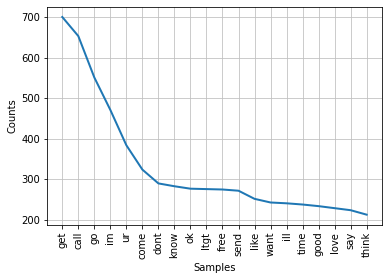

In [103]:
from matplotlib import pyplot as plt
text.plot(20)
plt.show()

In [105]:
text.concordance("chance")

Displaying 25 of 41 matches:
re tonight ive cry enough today six chance win cash 100 20000 pound txt csh11 
 861 85 85 prepayment direct access chance might evaporate soon violate privac
better yi tho im meet call later ur chance win 250 wkly shop spree txt shop 80
e princess run please send pics get chance ttyl subscribe best mobile content 
ave house gim ltgt minutes ago last chance claim ur 150 worth discount voucher
08000930705 reply delivery wed last chance claim ur 150 worth discount voucher
mpare violet tulip lily txt f 84025 chance win 100 cash wkent150p16 im work te
prepare wat shall eat say fantastic chance anything need bigger life lift lose
ix book reply harry answer question chance first among readers ok correct work
knw tht free 1st week entry textpod chance win 40gb ipod 250 cash every wk txt
anything ur best life get gas money chance gang want go grand nature adventure
outside wun home early neva mind ur chance win 250 cash every wk txt action 80
ne 0800 542 0578 buy sp

In [112]:
text.concordance("call")

Displaying 25 of 653 matches:
lect receivea 900 prize reward claim call 09061701461 claim code kl341 valid 1
te latest colour mobiles camera free call mobile update co free 08002986030 im
ummy 07732584351 rodger burn msg try call reply sms free nokia mobile free cam
e nokia mobile free camcorder please call 08000930705 delivery tomorrow see gr
 endow ltgt inch callsmessagesmissed call didnt get hep immunisation nigeria f
gt congrats year special cinema pass call 09061209465 suprman matrix3 starwars
x420ip45we 150pm dont miss sorry ill call later meet tell reach yesgauti sehwa
nt review mob award 1500 bonus prize call 09066364589 today song dedicate day 
 something xx kkwhere youhow perform call wait machan call free thats cool gen
here youhow perform call wait machan call free thats cool gentleman treat dign
ill look job much tas earn sorry ill call later call ah ok way home hi hi plac
b much tas earn sorry ill call later call ah ok way home hi hi place man yup n
y home hi hi place man

In [106]:
freq_dict = text.vocab()

In [107]:
freq_dict.most_common(5)

[('get', 700), ('call', 653), ('go', 551), ('im', 471), ('ur', 384)]

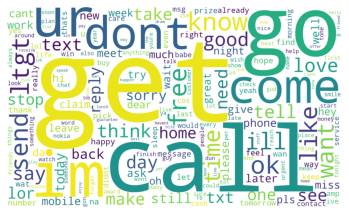

In [111]:
from wordcloud import WordCloud

wc = WordCloud(width=2000, height=1200, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(freq_dict))
plt.axis("off")
plt.show()

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.